In [16]:
import urllib.request, json 

# 5min BTC/USDT chart form Poloniex since 2017-01-01T00:00:00+00:00 till 2018-10-14T20:00:00+00:00
with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1483228800&end=1539547200&period=300") as url:
    data = json.loads(url.read().decode())

In [17]:
print(data[0])

{'date': 1483228800, 'high': 965.00000066, 'low': 964.00000002, 'open': 965.00000055, 'close': 964.00000127, 'volume': 5398.83711674, 'quoteVolume': 5.59672254, 'weightedAverage': 964.64262399}


In [20]:
import csv
import numpy as np
import pandas as pd
 
df = pd.DataFrame(data=data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
        
sma = df.rolling(20).mean().values[:,4]
df = df.assign(sma=sma)
df = df.fillna(0)
df. to_csv("poloniex_usdt_btc_20170101_DOHLCV_300_sma.csv", sep=";", index=False)

print(df)

              date         open         high          low        close  \
0       1483228800   965.000001   965.000001   964.000000   964.000001   
1       1483229100   966.150000   966.150000   964.000002   964.000002   
2       1483229400   964.050000   966.149988   962.028165   964.000000   
3       1483229700   962.028165   964.000000   961.700000   962.200001   
4       1483230000   964.000011   964.677377   962.769304   962.849999   
5       1483230300   962.860013   966.149998   962.860013   966.149998   
6       1483230600   962.880000   962.880000   962.879999   962.879999   
7       1483230900   963.492610   964.519098   963.492610   964.519097   
8       1483231200   963.545457   963.545459   963.545457   963.545459   
9       1483231500   963.066163   965.668127   963.066163   965.668127   
10      1483231800   965.668127   965.668127   963.579495   963.579495   
11      1483232100   964.133267   964.133267   964.133267   964.133267   
12      1483232400   964.133268   964.

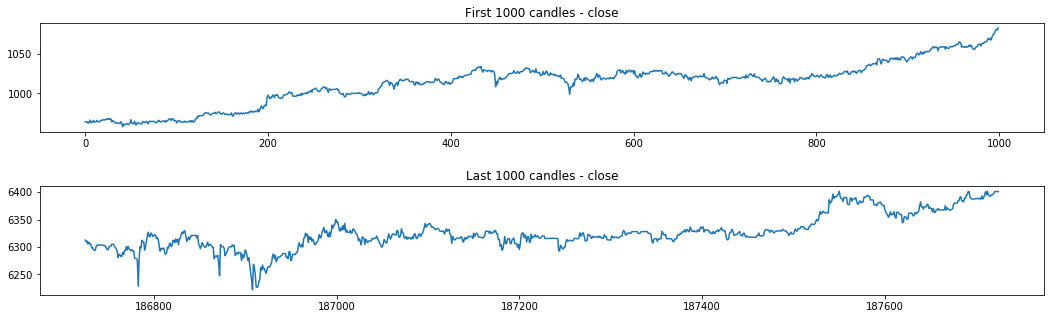

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# data = np.genfromtxt('poloniex_usdt_btc_20170101_DOHLCV_300.csv', delimiter=';', skip_header=1)

# Visualizing chart with close prices
# These charts are ok
plt.figure(figsize=(18, 5))
plt.subplot(211).set_title('First 1000 candles - close')
plt.plot(df.iloc[:1000, 4])
plt.subplot(212).set_title('Last 1000 candles - close')
plt.plot(df.iloc[-1000:, 4])
plt.subplots_adjust(hspace=0.5)
plt.show()


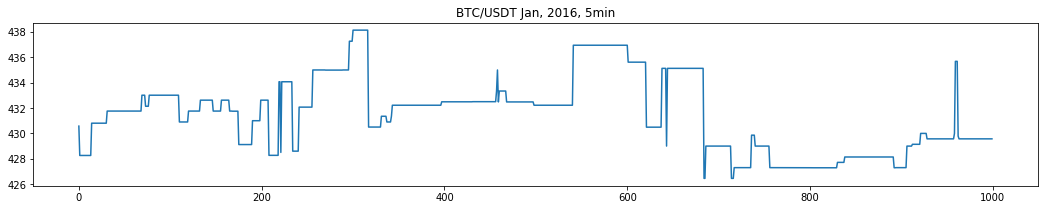

In [14]:
# Reason why we decided to use data from 2017:
# Chart from Jan, 2016 has flat parts because of low volume

# 5min BTC/USDT chart form Poloniex from Jan 01, 2016
with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1451606400&end=1454284800&period=300") as url:
    wrong_data = json.loads(url.read().decode())
    
wrong_close = []
for line in wrong_data:
    wrong_close.append(line['close'])

plt.figure(figsize=(18, 3))
plt.plot(wrong_close[:1000])
plt.title('BTC/USDT Jan 01, 2016, 5min')
plt.show()